In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['NumOfProducts'] = pd.Categorical(df.NumOfProducts)
df['HasCrCard'] = pd.Categorical(df.HasCrCard)
df['IsActiveMember'] = pd.Categorical(df.IsActiveMember)
df['Tenure'] = pd.Categorical(df.Tenure)
df['Gender'] = pd.Categorical(df.Gender)
df['Exited'] = pd.Categorical(df.Exited)
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.0,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.0
unique,NaN,NaN,2932,NaN,3,2,NaN,11.0,NaN,4.0,2.0,2.0,NaN,2.0
top,NaN,NaN,Smith,NaN,France,Male,NaN,2.0,NaN,1.0,1.0,1.0,NaN,0.0
freq,NaN,NaN,32,NaN,5014,5457,NaN,1048.0,NaN,5084.0,7055.0,5151.0,NaN,7963.0
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,NaN,76485.889288,NaN,NaN,NaN,100090.239881,NaN
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,NaN,62397.405202,NaN,NaN,NaN,57510.492818,NaN
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,NaN,0.000000,NaN,NaN,NaN,11.580000,NaN
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,NaN,0.000000,NaN,NaN,NaN,51002.110000,NaN
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,NaN,97198.540000,NaN,NaN,NaN,100193.915000,NaN
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,NaN,127644.240000,NaN,NaN,NaN,149388.247500,NaN


In [4]:
df = pd.get_dummies(df, 
                                    prefix=['Geo','Gen'], 
                                    prefix_sep='_',
                                    dummy_na=False, 
                                    columns=['Geography','Gender'],
                                    sparse=False,
                                    drop_first=False,
                                    dtype=int)
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [5]:
feature_cols = [ 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','CreditScore', 'Balance', 'EstimatedSalary','Geo_France','Geo_Germany','Geo_Spain','Gen_Female','Gen_Male']

X = df[feature_cols]
y = df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
X_train

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Balance,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male
1554,4,2,1,1,628,158741.43,126192.54,1,0,0,0,1
2087,7,2,1,0,716,65971.61,14608.00,1,0,0,1,0
5470,1,2,1,1,617,102585.88,115387.40,1,0,0,0,1
2363,9,2,0,1,571,0.00,77519.62,1,0,0,1,0
7570,7,3,1,0,697,175464.85,116442.42,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9225,4,2,1,1,594,120074.97,162961.79,0,1,0,1,0
4859,4,1,1,1,794,114440.24,107753.07,0,0,1,1,0
3264,5,2,1,0,738,161274.05,181429.87,1,0,0,0,1
9845,9,2,1,1,590,0.00,148750.16,0,0,1,1,0


In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.747
Precision: 0.24175824175824176
Recall: 0.10679611650485436
F1 Score: 0.14814814814814814


Text(0.5, 447.52, 'Predicted label')

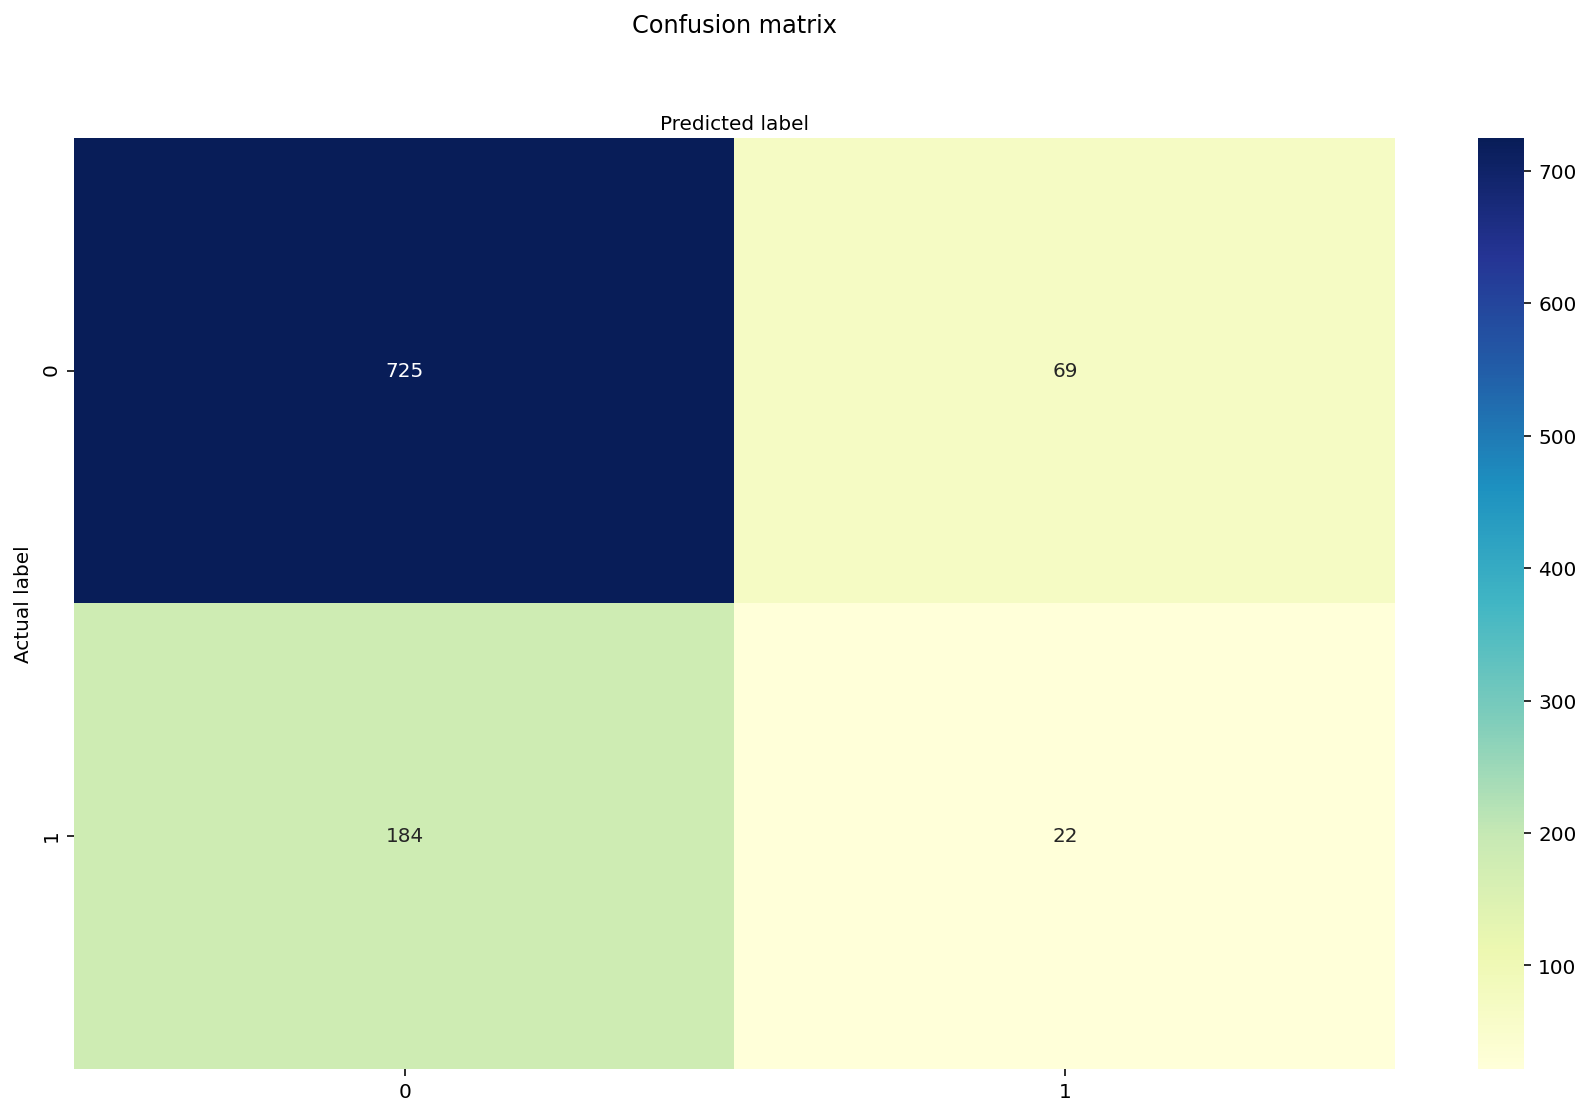

In [7]:
import seaborn as sns
conn_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conn_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#feature scaling
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.34302584,  0.80873785,  0.64376017, ..., -0.57478426,
        -0.91166287,  0.91166287],
       [ 0.69365399,  0.80873785,  0.64376017, ..., -0.57478426,
         1.0968967 , -1.0968967 ],
       [-1.37970566,  0.80873785,  0.64376017, ..., -0.57478426,
        -0.91166287,  0.91166287],
       ...,
       [ 0.00253411,  0.80873785,  0.64376017, ..., -0.57478426,
        -0.91166287,  0.91166287],
       [ 1.38477387,  0.80873785,  0.64376017, ...,  1.73978322,
         1.0968967 , -1.0968967 ],
       [-1.37970566, -0.91605851,  0.64376017, ..., -0.57478426,
         1.0968967 , -1.0968967 ]])

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.784
Precision: 0.4647887323943662
Recall: 0.32038834951456313
F1 Score: 0.37931034482758624


Text(0.5, 447.52, 'Predicted label')

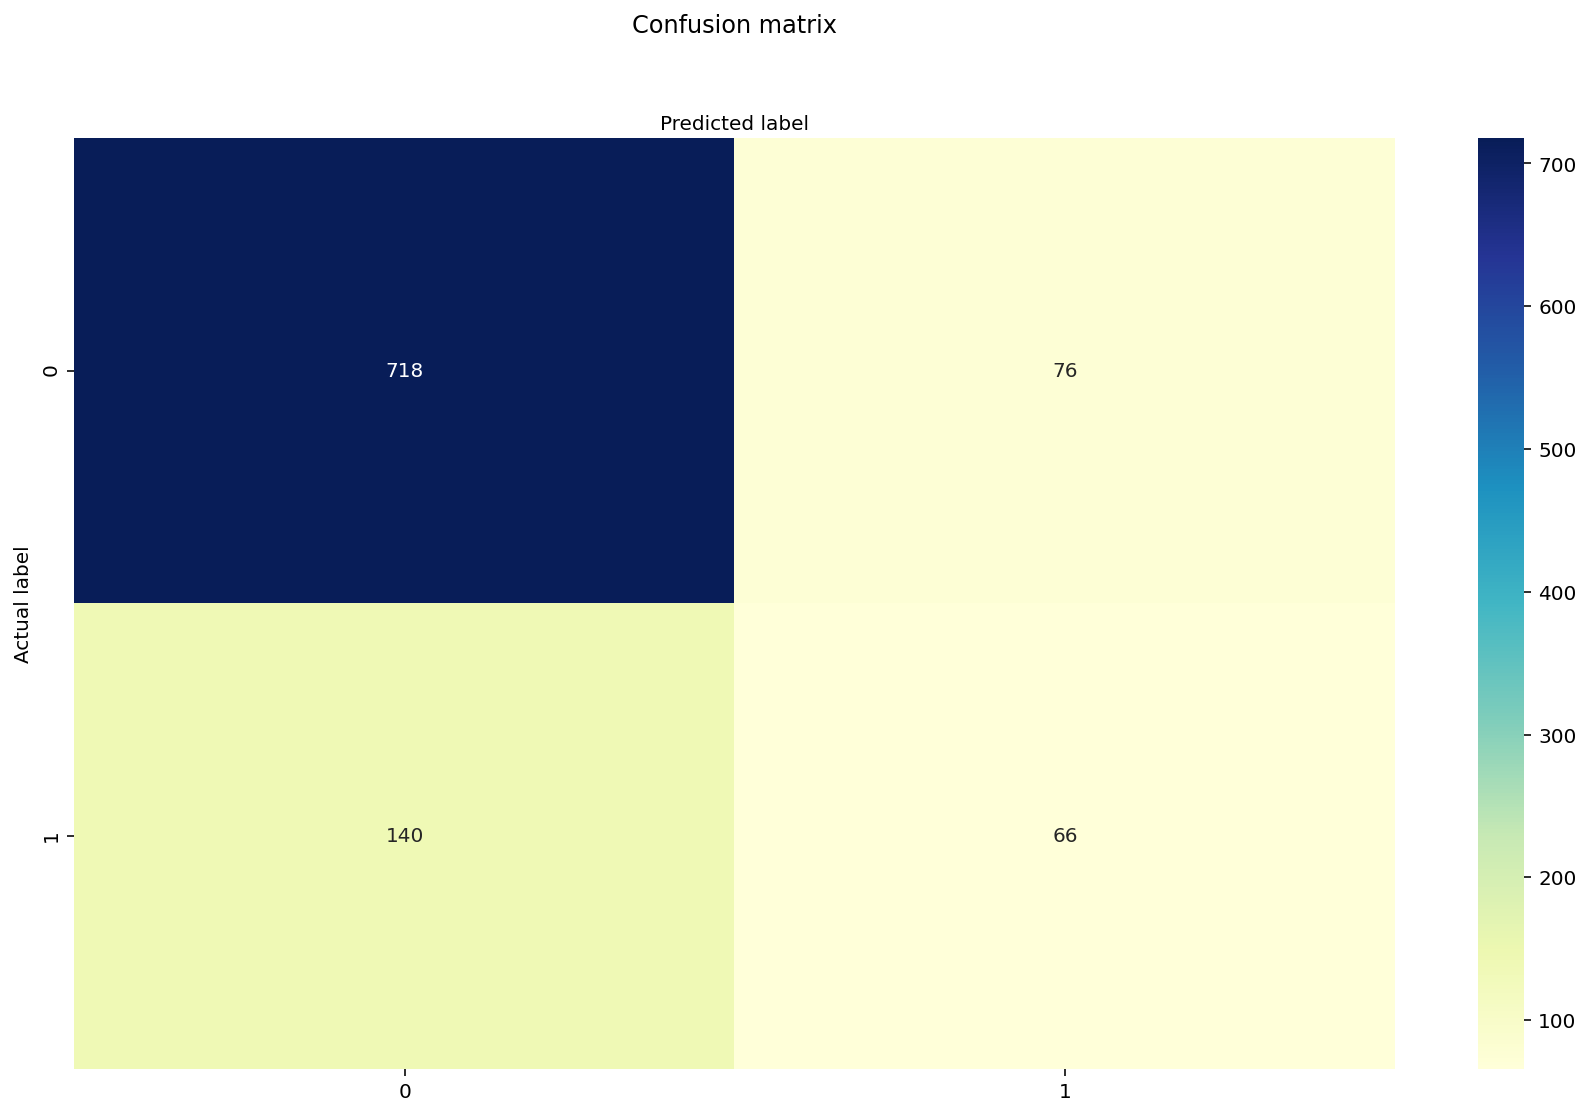

In [10]:
import seaborn as sns
con_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')